In [1]:
import xarray as xr
import fsspec

In [2]:
file_location = 's3://mur-sst/zarr'

ikey = fsspec.get_mapper(file_location, anon=True)

mur_full = xr.open_zarr(ikey, consolidated=True)

1. Look at the xarray represenation of the output. What are the dimensions of this dataset? What is the spatial domain (largest and smallest lat/lon values)?

In [3]:
mur_full

,Array,Chunk
Bytes,15.19 TiB,245.78 MiB
Shape,"(6443, 17999, 36000)","(6443, 100, 100)"
Count,64801 Tasks,64800 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,15.19 TiB,245.78 MiB
Shape,"(6443, 17999, 36000)","(6443, 100, 100)"
Count,64801 Tasks,64800 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


2. Create a new variable that holds just the `analysed_sst` DataArray.

In [4]:
mur = mur_full['analysed_sst']

In [5]:
mur

,Array,Chunk
Bytes,15.19 TiB,245.78 MiB
Shape,"(6443, 17999, 36000)","(6443, 100, 100)"
Count,64801 Tasks,64800 Chunks
Type,float32,numpy.ndarray


3. On a piece of paper, draw a cube that represents this data. Label each of the axes with the coordinate bounds of the axis and the number of pixels on that axis.

4. Let's zoom into an area of interest. Create a subset of data between -78 and -70 longitude and 34 and 40 latitude. Also select data from just the year 2016.

In [6]:
mur_subset = mur.sel(lat=slice(34, 40), lon=slice(-78, -70), time='2016')

In [10]:
mur_subset

<xarray.DataArray 'analysed_sst' (time: 366, lat: 601, lon: 801)>
dask.array<getitem, shape=(366, 601, 801), dtype=float32, chunksize=(366, 100, 100), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 34.0 34.01 34.02 34.03 ... 39.97 39.98 39.99 40.0
  * lon      (lon) float32 -78.0 -77.99 -77.98 -77.97 ... -70.02 -70.01 -70.0
  * time     (time) datetime64[ns] 2016-01-01T09:00:00 ... 2016-12-31T09:00:00
Attributes:
    comment:        "Final" version using Multi-Resolution Variational Analys...
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_max:      32767
    valid_min:      -32767

5. Re-draw the cube on your paper representing this array. Label each of the axes with the coordinate bounds of the axis and the number of pixels on that axis.

Use the `da.plot()` method to plot **just one** timestep of the DataArray. Running this step could take a minute or two.

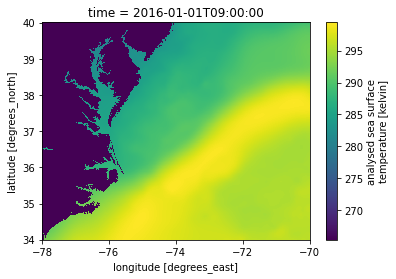

In [8]:
mur_subset.isel(time=0).plot()

Hint: Use .sel or .isel before .plot to get just one timestep.

This dataset is of ocean surface temperature but we can see from the plot that there are values of about 265-270 over land. Mask out any values where SST is less than 270 with np.nan.

The temperature of the water is given in Kelvin. Convert the dataset to Celsius using the equation Celsius = Kelvin - 273.

Find the mean value of the array at each time step.  Use `.compute()` at the end of the calculation.

In [11]:
mur_subset.mean().compute()

<xarray.DataArray 'analysed_sst' ()>
array(287.27872, dtype=float32)

What are the new shape and dimensions of the array? Draw a cube on your paper to represent this array.

Plot the array.

Looking at the output we are seeing the temperature rise and fall over the course of the year. That is a time series of the seasonal variation in SST in the gulf stream region!